In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    X = np.array([float(line.split()[0]) for line in lines])
    Y= np.array([float(line.split()[1]) for line in lines])
    return X,Y
    
    

In [3]:
file_path_train = "/Users/harry/Downloads/ridgetrain.txt"
file_path_test = "/Users/harry/Downloads/ridgetest.txt"
X_train,Y_train = load_data(file_path_train)
X_test,Y_test = load_data(file_path_test)


In [4]:
def cal_kernel(a,b):
    gamma =0.1
    return np.exp(-gamma*np.linalg.norm(a -b)**2)

In [5]:
def cal_K(X):
    size =X.shape[0]
    K= np.empty((size,size), dtype=float)
    for i in range(size):
        for j in range(size):
            K[i,j]= cal_kernel(X[i],X[j])
   
    return K
            
    

In [6]:
def cal_alpha(X,Y,lamda):
    K = cal_K(X)
    size = X.shape[0]
    I = np.identity(size,dtype =float)
    inverse= np.linalg.inv(K + lamda*I)
    alpha = np.matmul(inverse,Y)
    return alpha

    

In [7]:
def make_plot(X,pred_Y,Y,lamda,flag):
    plt.scatter(X,pred_Y,lw =2,color='blue', label='Prediction')
    plt.scatter(X,Y,lw =2,color='red', label='Actual')
    plt.xlabel('input')
    plt.ylabel('Output')
    str1="lambda"
    question ='Q1a'
    if (flag==2):
        str1="L"
        question='Q1b'
        
    plt.title('Result for {}:{}'.format(str1,lamda))
    plt.legend()
    plt.grid(True)   
    filename = question+' for '+str1+'='+str(lamda)+'.png'
    plt.savefig(filename) 
    plt.show()

In [21]:
def main_(lamda): 
    predict_Y =[]
    alpha = cal_alpha(X_train,Y_train,lamda)
    for i in range(X_test.shape[0]):
        sum=0
        for j in range(X_train.shape[0]):
            sum+= alpha[j]*cal_kernel(X_test[i],X_train[j])

        predict_Y.append(sum)
    pred_Y =np.array(predict_Y)
    mse = mean_squared_error(Y_test, pred_Y)
    rmse = np.sqrt(mse)
    print("The RMSE comes out to be:",rmse)
    make_plot(X_test,pred_Y,Y_test,lamda,1)

   



The RMSE comes out to be: 0.032577670293575944


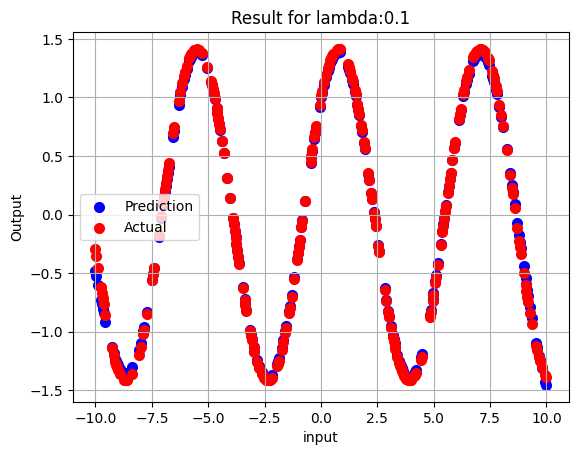

In [22]:
main_(0.1)

The RMSE comes out to be: 0.1703039034420253


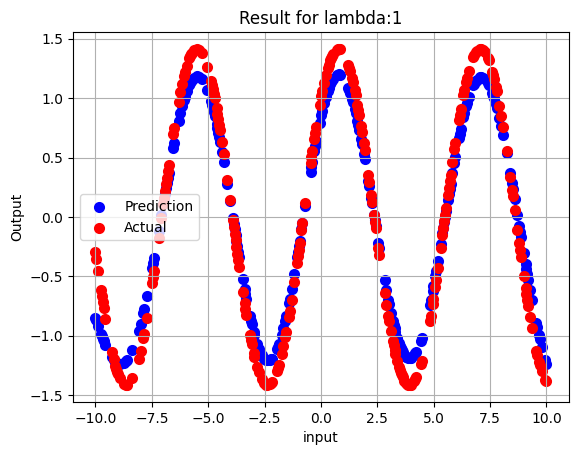

In [9]:
main_(1)

The RMSE comes out to be: 0.6092671596540067


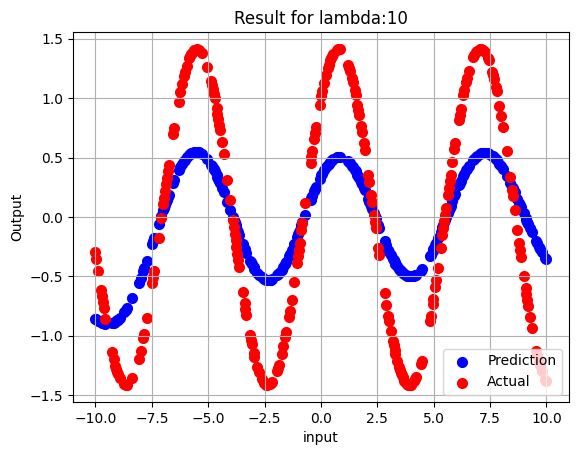

In [10]:
main_(10)

The RMSE comes out to be: 0.9110858052767243


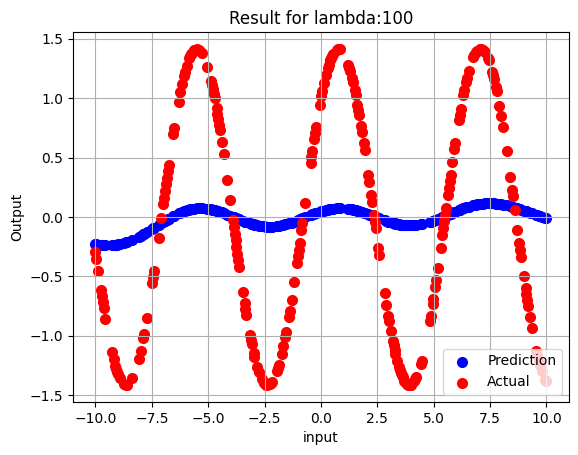

In [11]:
main_(100)

## landmark - Part (B)


In [12]:
def choose_numbers(arr,num):
    numbers = np.random.choice(arr, size=num, replace=False)
    return numbers

In [13]:
def new_features(X,landmarks):
    list=[]
    for i in range(landmarks.shape[0]):
        list.append(cal_kernel(X,landmarks[i]))
    
    return np.array(list)

In [14]:
def generate_phi(X_train,X_test,L):
    row = X_train.shape[0]
    row1 = X_test.shape[0]
    col = L
    phi_train= np.empty((row,col), dtype=float)
    phi_test= np.empty((row1,col), dtype=float)
    landmarks = choose_numbers(X_train,L)
    for i in range(row):
        phi_train[i,:]= new_features(X_train[i], landmarks)
    for i in range(row1):
        phi_test[i,:]= new_features(X_test[i], landmarks)

    return phi_train,phi_test

In [15]:
#Model Fitting:
def main2_(L):
    lamda1 = 0.1
    ridge_model = Ridge(alpha=lamda1)
    phi_train,phi_test = generate_phi(X_train,X_test,L)
    
    ridge_model.fit(phi_train, Y_train)
    y_pred = ridge_model.predict(phi_test)
    mse = mean_squared_error(Y_test,y_pred)
    rmse = np.sqrt(mse)
    print("The RMSE comes out to be:",rmse)
    
    make_plot(X_test,y_pred,Y_test,L,2)

The RMSE comes out to be: 0.968306965772423


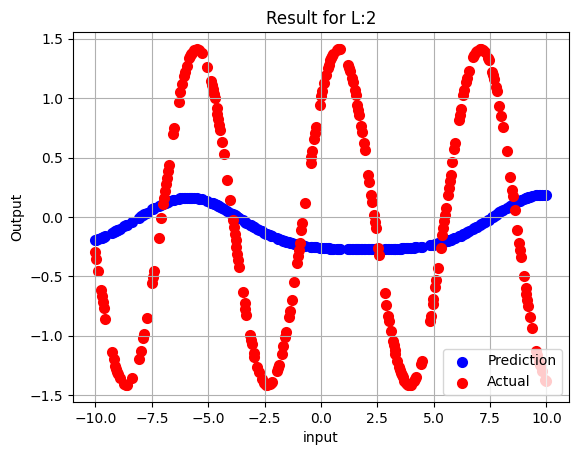

In [16]:
main2_(2)

The RMSE comes out to be: 0.8336342075242033


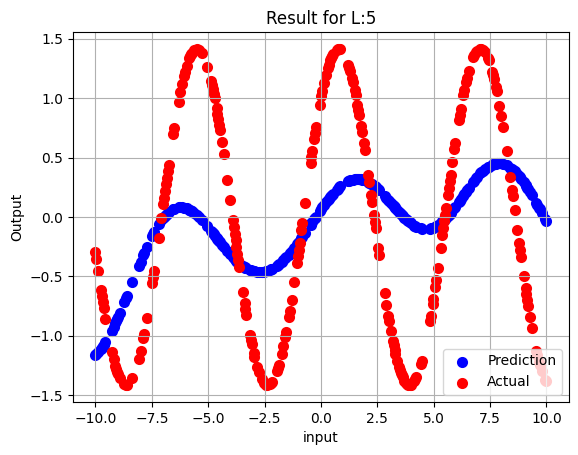

In [17]:
main2_(5)

The RMSE comes out to be: 0.128697983945963


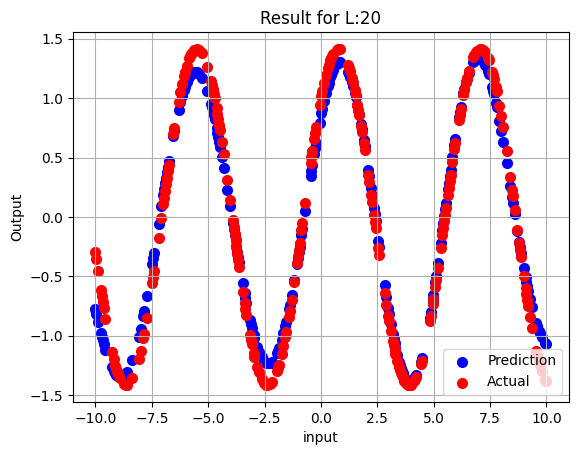

In [18]:
main2_(20)

The RMSE comes out to be: 0.06747710958441967


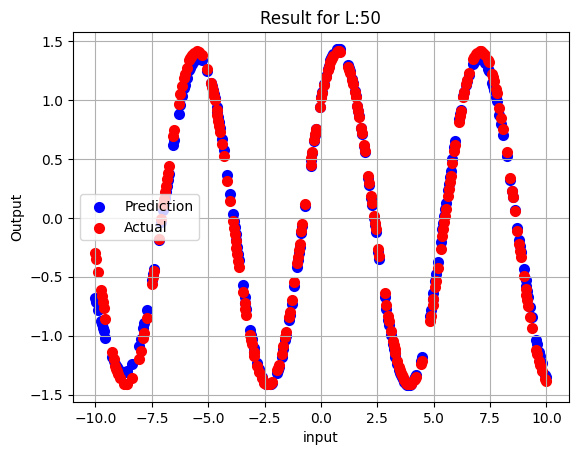

In [19]:
main2_(50)

The RMSE comes out to be: 0.025426791270385045


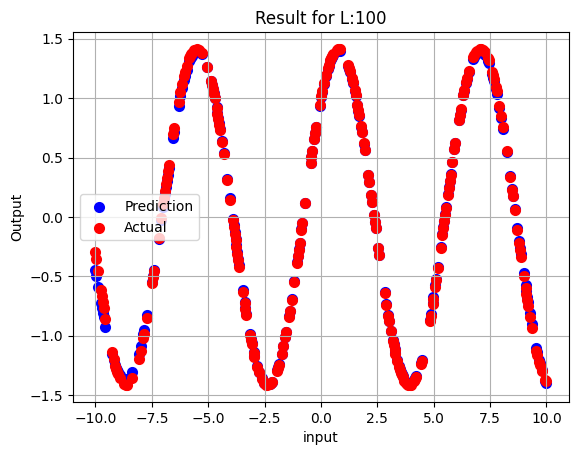

In [20]:
main2_(100)